Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Create a model predicting potential Heart Diseases in people using Machine
Learning algorithms.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [25]:
df1=pd.read_csv('labels.csv')
df1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [27]:
df2=pd.read_csv('values.csv')
df2

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [29]:
df=pd.merge(df2,df1)
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


Basics Checks:

In [31]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [33]:
df.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [37]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


Data Cleaning

In [41]:
df.shape

(180, 15)

In [43]:
df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

Data Preprocessing

In [45]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [47]:
df.thal.value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [49]:
df.age.value_counts()

age
54    12
58    10
44     9
64     9
51     9
57     8
60     7
62     7
41     6
67     6
55     6
59     6
48     6
65     6
63     5
45     5
52     5
49     4
56     4
53     4
66     4
50     4
42     4
61     3
40     3
70     3
46     3
71     3
68     3
43     2
35     2
47     2
69     2
39     2
74     1
38     1
29     1
77     1
37     1
34     1
Name: count, dtype: int64

In [51]:
df.max_heart_rate_achieved.value_counts()

max_heart_rate_achieved
162    10
132     6
142     6
170     5
152     5
       ..
186     1
121     1
120     1
137     1
117     1
Name: count, Length: 73, dtype: int64

In [53]:
df.resting_blood_pressure.value_counts()

resting_blood_pressure
130    26
140    22
120    21
110    11
150    10
160     9
128     8
112     8
125     7
124     5
108     5
118     4
145     4
135     4
138     3
180     3
132     3
126     2
115     2
178     2
142     2
100     2
152     2
136     2
134     2
102     1
94      1
155     1
117     1
170     1
172     1
122     1
156     1
106     1
144     1
105     1
Name: count, dtype: int64

In [55]:
df.exercise_induced_angina.value_counts()

exercise_induced_angina
0    123
1     57
Name: count, dtype: int64

In [59]:
df.heart_disease_present.value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

In [61]:
df.groupby('thal')['exercise_induced_angina'].median()

thal
fixed_defect         0.0
normal               0.0
reversible_defect    1.0
Name: exercise_induced_angina, dtype: float64

In [63]:
df.groupby('thal')['chest_pain_type'].mean()

thal
fixed_defect         3.125000
normal               2.897959
reversible_defect    3.500000
Name: chest_pain_type, dtype: float64

In [65]:
df.groupby('thal')['age'].median()

thal
fixed_defect         58.0
normal               54.0
reversible_defect    56.5
Name: age, dtype: float64

In [67]:
df.groupby('thal')['sex'].median()

thal
fixed_defect         1.0
normal               1.0
reversible_defect    1.0
Name: sex, dtype: float64

In [69]:
df.groupby('thal')['serum_cholesterol_mg_per_dl'].mean()   

thal
fixed_defect         227.250000
normal               250.255102
reversible_defect    250.202703
Name: serum_cholesterol_mg_per_dl, dtype: float64

EDA

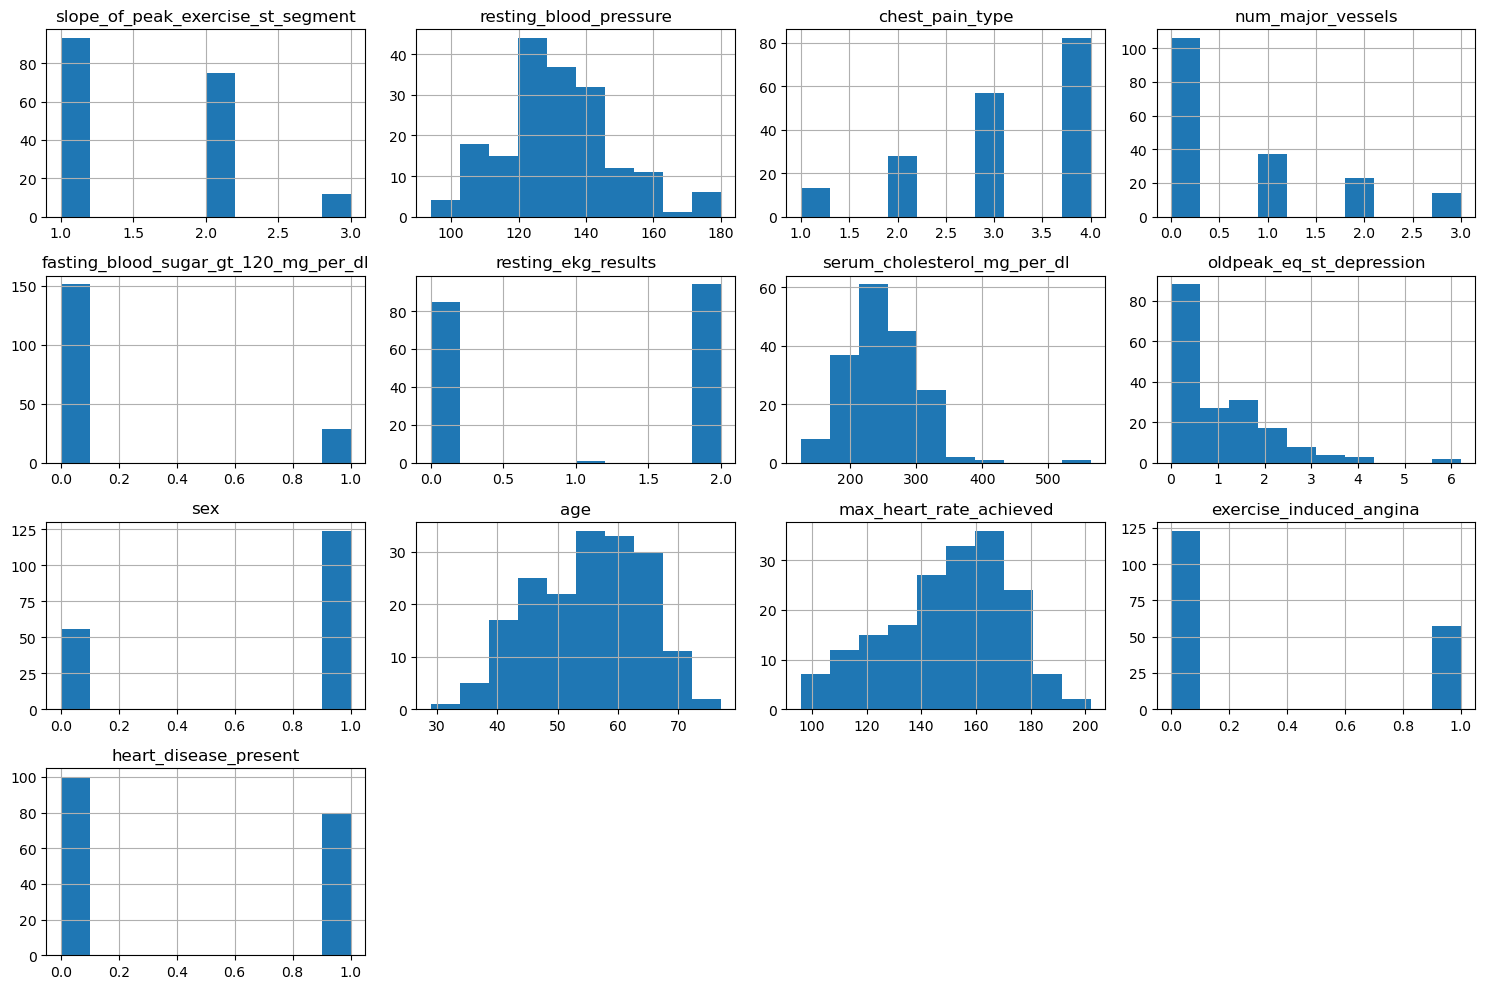

In [71]:
#Histogram for Numeric Columns
import matplotlib.pyplot as plt
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

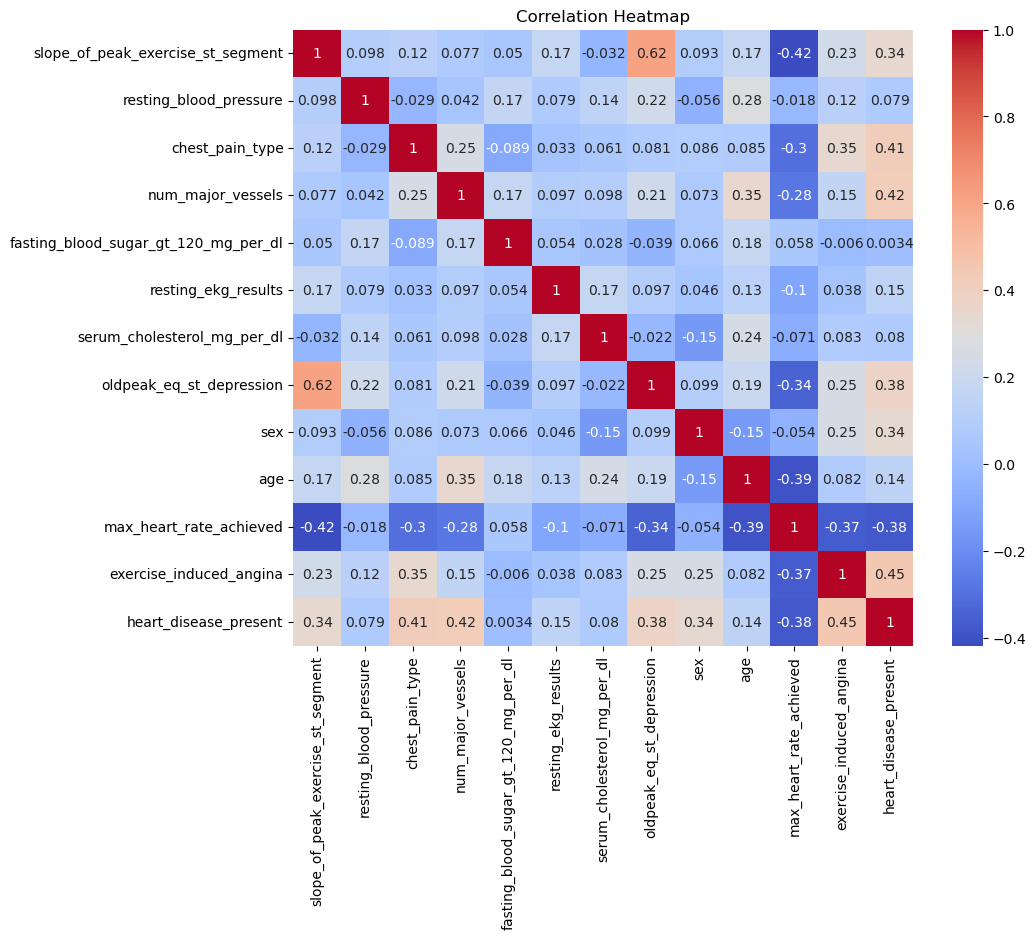

In [73]:
#Correlation Heatmap for Numeric Columns
# Select only numeric columns
import seaborn as sns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

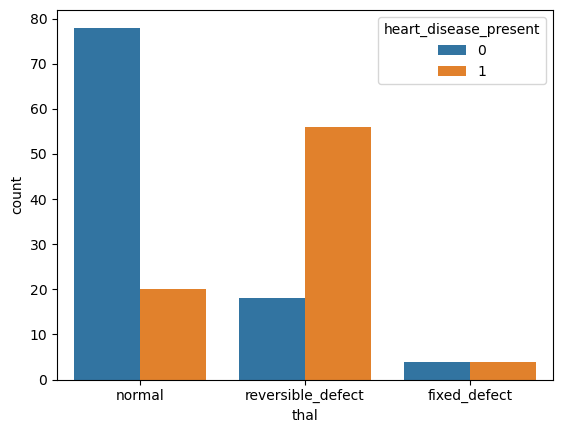

In [75]:
sns.countplot(x='thal',data=df,hue='heart_disease_present')
plt.show()

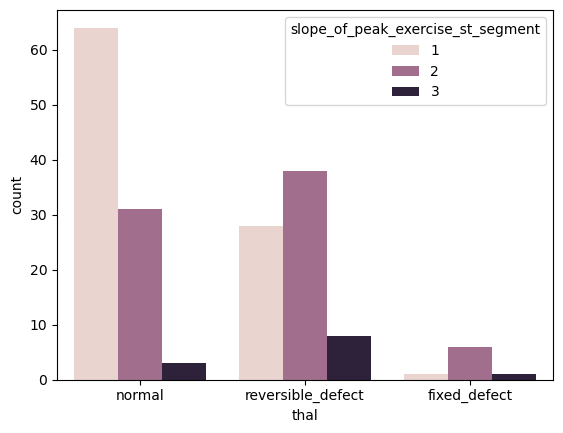

In [77]:
sns.countplot(x='thal',data=df,hue='slope_of_peak_exercise_st_segment')
plt.show()

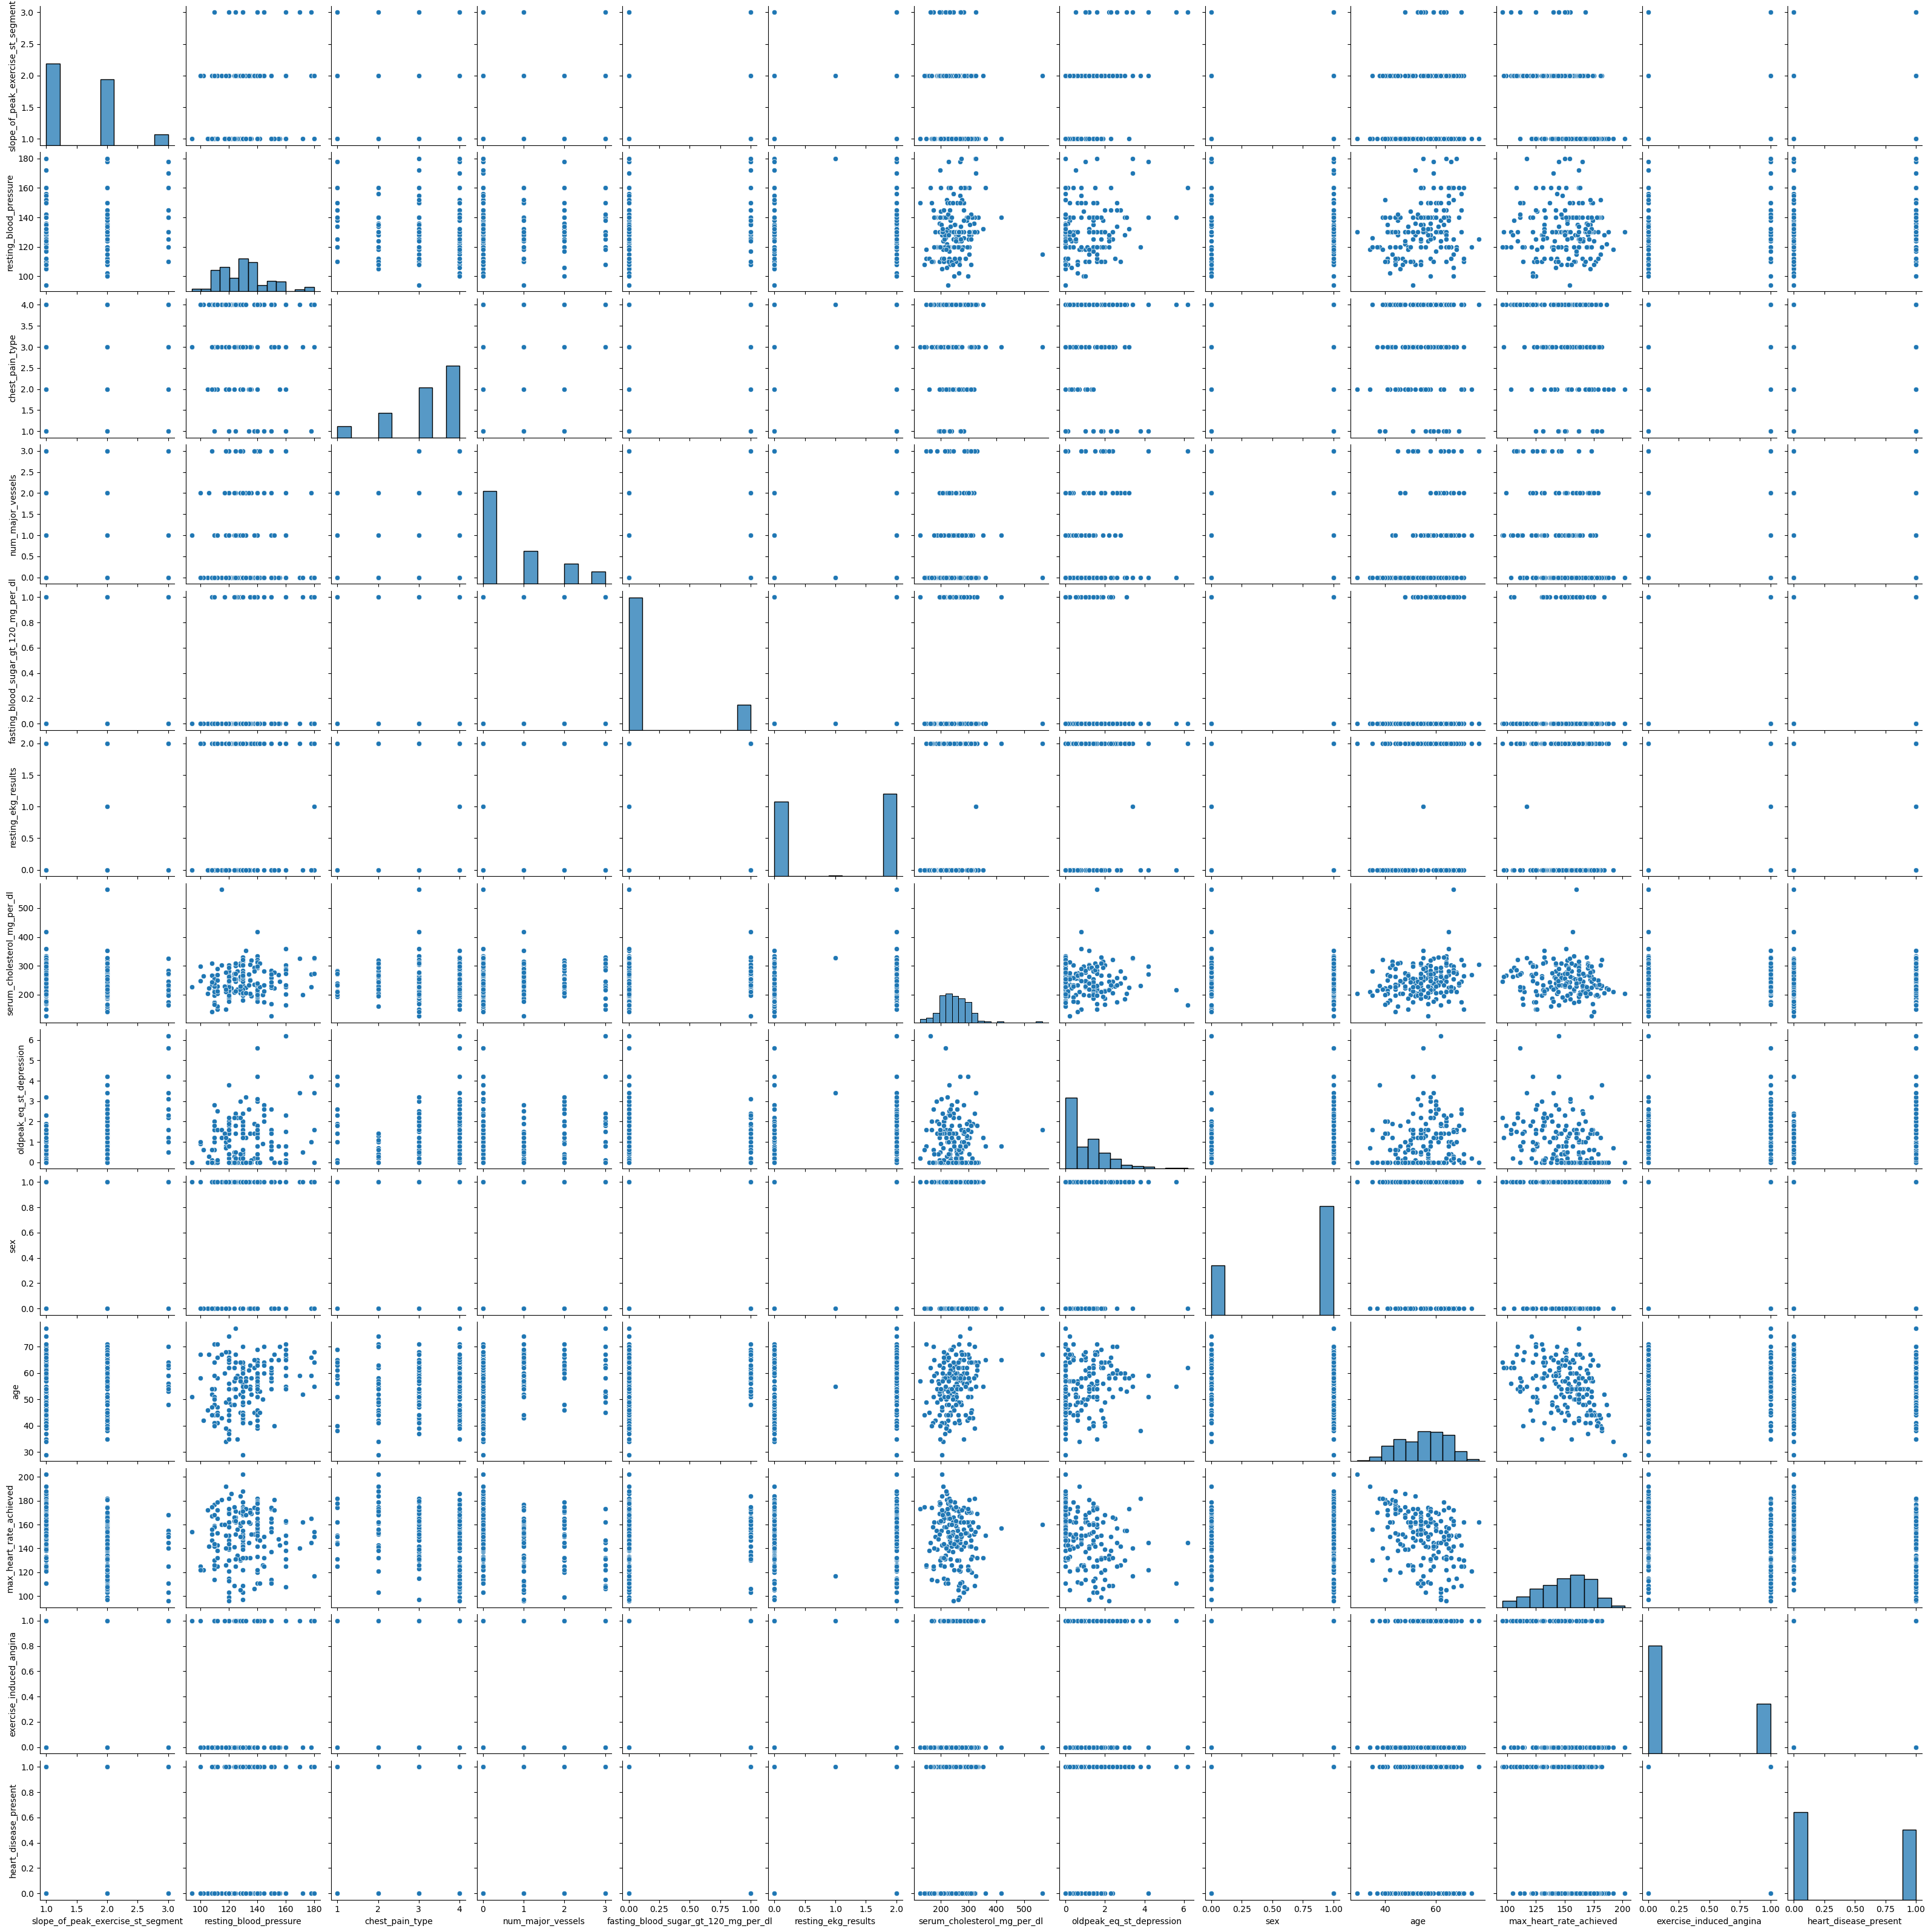

In [79]:
sns.pairplot(df)

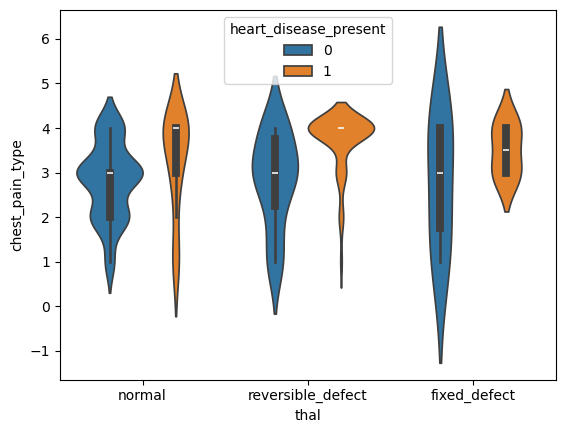

In [81]:
sns.violinplot(x='thal',y='chest_pain_type',data=df,hue='heart_disease_present')
plt.show()

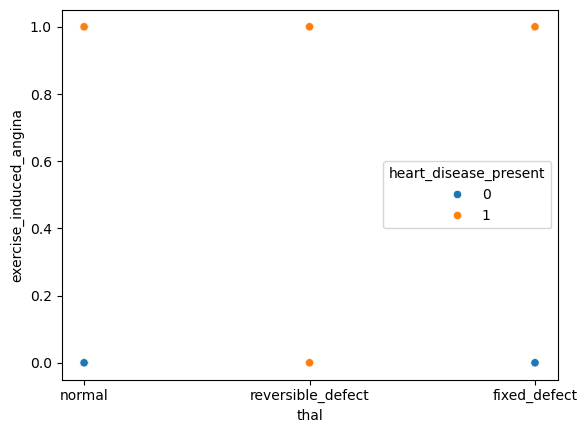

In [83]:
sns.scatterplot(x='thal',y='exercise_induced_angina',data=df,hue='heart_disease_present')
plt.show()

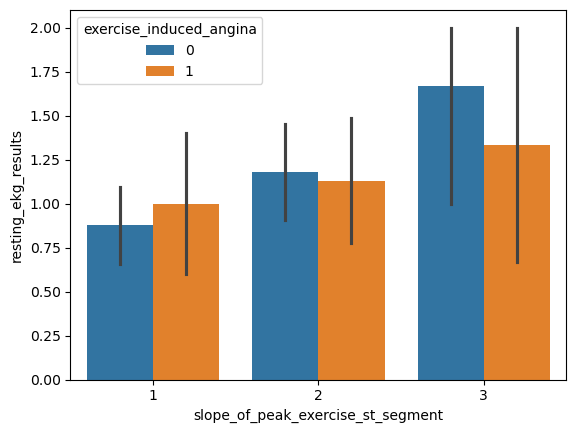

In [85]:
sns.barplot(x='slope_of_peak_exercise_st_segment',y='resting_ekg_results',data=df,hue='exercise_induced_angina')
plt.show()

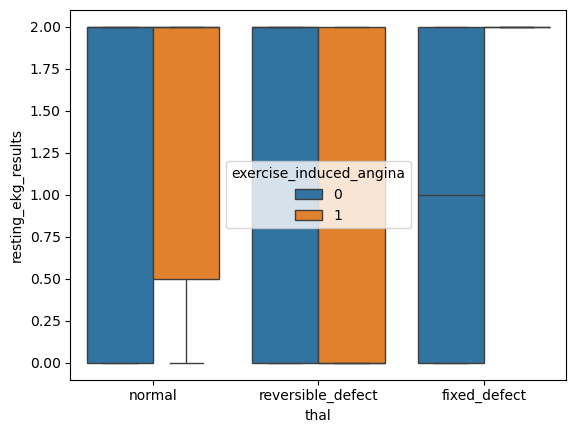

In [87]:
sns.boxplot(x='thal',y='resting_ekg_results',data=df,hue='exercise_induced_angina')
plt.show()

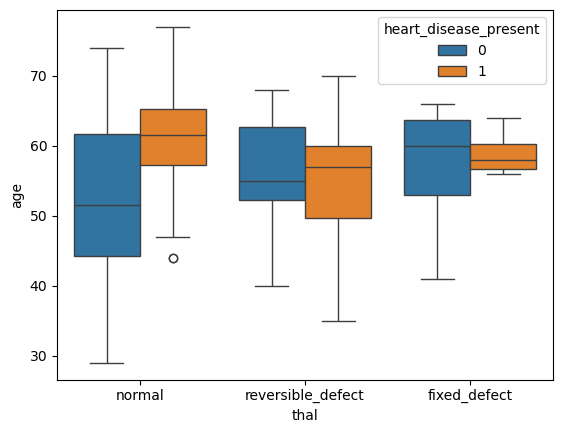

In [89]:
sns.boxplot(x='thal',y='age',data=df,hue='heart_disease_present')
plt.show()

Implementation

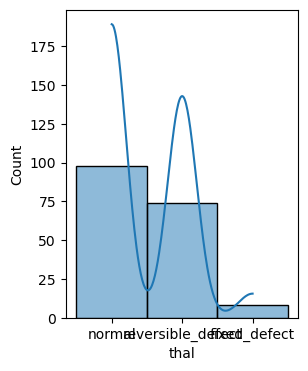

In [91]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['thal'], kde= True) # left skewed
plt.show()

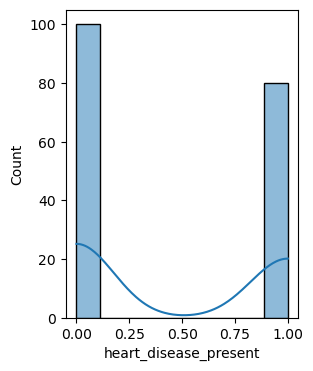

In [93]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['heart_disease_present'], kde= True) # left skewed
plt.show()

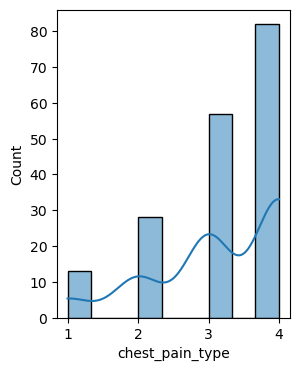

In [95]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['chest_pain_type'], kde= True) # right screwed
plt.show()

We are able to see that some of columns were right skewed and some were left skewed.

Using LabelEncoder

In [97]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['thal']=le.fit_transform(df['thal'])
print(df['thal'])

0      1
1      1
2      1
3      2
4      2
      ..
175    2
176    1
177    2
178    1
179    1
Name: thal, Length: 180, dtype: int32


In [137]:
df.drop('patient_id',axis=1,inplace=True)
df


,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [139]:
df

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [141]:
# Split data into features and target
X =df.drop(columns=["heart_disease_present"])
y = df["heart_disease_present"]

In [143]:
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0


In [145]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [149]:
y_train

117    1
65     1
67     0
31     1
12     1
      ..
71     0
106    0
14     1
92     0
102    1
Name: heart_disease_present, Length: 144, dtype: int64

In [151]:
y_test

19     1
42     0
153    1
78     1
145    0
15     1
24     0
68     0
113    1
118    1
93     1
159    1
69     1
142    0
45     1
16     0
51     0
125    0
96     1
56     1
97     0
120    1
143    1
30     0
9      0
172    1
60     0
18     0
148    1
173    1
109    1
55     0
140    1
126    0
66     1
29     0
Name: heart_disease_present, dtype: int64

1.Using Logistic Regression:

In [153]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)  ## training

LogisticRegression()

In [155]:
y_predict=lr.predict(X_test)
y_predict

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [157]:
# Evaluate the model on the test set

from sklearn.metrics import *
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

# Print the test metrics
print("Test set MSE:", mse)
print("Test set MAE:", mae)
print("Test set R^2:", r2)

Test set MSE: 0.16666666666666666
Test set MAE: 0.16666666666666666
Test set R^2: 0.32500000000000007


In [159]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[14  2]
 [ 4 16]]


In [161]:
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.89      0.80      0.84        20

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



2.Using Linear Regression:

In [163]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)  ## training

LinearRegression()

In [165]:
y_predict=lr.predict(X_test)
y_predict

array([0.12083356, 0.04151996, 0.44753445, 1.17680357, 0.02120932,
       0.80622428, 0.06536016, 0.0906163 , 0.65618756, 0.93968325,
       0.86462151, 1.11148011, 0.87423592, 0.16755786, 0.19684413,
       0.03544781, 0.4194533 , 0.12376396, 0.60647136, 0.97215485,
       0.13375326, 0.17540454, 0.87336485, 0.40465181, 0.13393994,
       0.58772334, 0.48354326, 0.05363378, 0.11673781, 0.67010913,
       0.58033279, 0.30074512, 1.15436227, 0.31916593, 0.97576448,
       0.14865081])

In [167]:
# Evaluate the model on the test set

from sklearn.metrics import *
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)


# Print the test metrics
print("Test set MSE:", mse)
print("Test set MAE:", mae)
print("Test set R^2:", r2)

Test set MSE: 0.1377078212188054
Test set MAE: 0.27559529794087195
Test set R^2: 0.4422833240638382


3.Using Decision Tree Classifier:

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
model = DecisionTreeClassifier(random_state=42,criterion='gini',splitter='best',max_depth=4)#object creation
model.fit(X_train, y_train)#training
y_predict=model.predict(X_test)#testing
# Predicting and evaluating
acc=accuracy_score(y_test,y_predict)
acc

0.7222222222222222

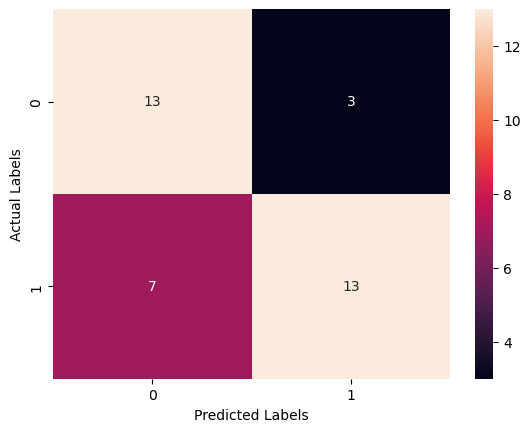

In [171]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Display the plot
plt.show()

4.SMOTE

In [173]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [175]:


from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
# from sklearn.metrics import classification_report

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Training the Decision Tree model with balanced class weights
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred=model.predict(X_test)
# Predicting and evaluating
acc=accuracy_score(y_test,y_predict)
acc

0.7222222222222222

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        16
           1       0.81      0.65      0.72        20

    accuracy                           0.72        36
   macro avg       0.73      0.73      0.72        36
weighted avg       0.74      0.72      0.72        36



In [179]:
model = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='gini',random_state=42)
model.fit(X_train_resampled, y_train_resampled)
# Make predictions
y_predict = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.6666666666666666

5.Using GridSearchCV Hyperparameter Tuning

In [181]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 10))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4,5,6,7],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 10))#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier()                # object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=5, cv=5)
tree_cv.fit(X_train,y_train)    # training data on gridsearch cv
best_params = tree_cv.best_params_    # it will give you best parameters
print(f"Best paramters: {best_params}")   # printing  best parameters

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 7, 'min_samples_split': 2, 'splitter': 'random'}


In [187]:
#best_params={'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 7, 'splitter': 'random'}
dt1=DecisionTreeClassifier(**best_params)
dt1.fit(X_train,y_train)
y_pred=dt1.predict(X_test)
accuracy_score(y_test,y_predict)

0.8055555555555556

6.Using Random Forest:

In [189]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_predict=rf_clf.predict(X_test)
accuracy_score(y_test,y_predict)

0.8333333333333334

In [191]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36



7.Using Hyperparameter Tuning with GridSearch CV

In [199]:
n_estimators = [100,150,200,250,300]  
max_features = ['auto', 'sqrt','log2']
max_depth = [10,20,30]
max_depth.append(None)
min_samples_split = [5, 10]
min_samples_leaf = [2, 4]

#dictionary for hyperparameters
random_grid = {'n_estimators': [100,150,200,250,300] , 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=42)   # Loading the model

rf_cv = GridSearchCV(estimator=rf_clf1, scoring='accuracy',param_grid= random_grid, cv=3,
                               verbose=2, n_jobs=-1)
rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 240 candidates, totalling 720 fits
Best paramters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200})


In [201]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [197]:
y_predict=rf_clf2.predict(X_test)
accur=accuracy_score(y_test,y_predict)
accur

0.8055555555555556

In [203]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.88      0.75      0.81        20

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.82      0.81      0.81        36



8.Using Gradient Boosting Classfier

In [205]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(random_state=42)
gbm.fit(X_train,y_train)
y_predict=gbm.predict(X_test)
accur=accuracy_score(y_test,y_predict)
accur

0.75

9.Using XGBOOST

In [207]:
pip install xgboost

In [263]:
from xgboost import XGBClassifier
Xgb=XGBClassifier(random_state=42)
Xgb.fit(X_train,y_train)
y_predict=Xgb.predict(X_test)
accuracy=accuracy_score(y_test,y_predict)
accuracy


0.7777777777777778

10.Using SVC

In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import *

In [211]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(mean_squared_error(y_test,y_predict))
print(classification_report(y_test, y_predict))

0.75
0.25
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.82      0.70      0.76        20

    accuracy                           0.75        36
   macro avg       0.75      0.76      0.75        36
weighted avg       0.76      0.75      0.75        36



Conclusion:

In [ ]:
*Decision Tree Classifier:0.72
*Smote:0.7222
*SMOTE(Using Hyperparameter tuning):0.666
*Hyperparameter Tuning with GridSearchCV:0.80
*Random Forest :0.8333333333333334
*GradientBoosing Classifier:0.75
*XGBoost:0.77
*SVC(Support Vector Classfier):0.75



In [ ]:
Final Model Selection
--.Insights and Recommendations
--Business Insights from EDA
--Transformations
--Challenges Faced
Data Challenges and Solutions
Modeling Challenges and Solutions
--Conclusion
Summary of Findings
--Recommendations
More appropriate timing


Task3:-Suggestions to the Hospital to awake the predictions of heart diseases prevent life
threats.

In [213]:
# Generate personalized recommendations
def generate_recommendations(predictions):
    recommendations = []
    for pred in predictions:
        if pred == 1:
            recommendations.append("High risk of heart disease detected. Immediate lifestyle changes needed: healthy diet, regular exercise, and medical consultation.")
        else:
            recommendations.append("Low risk detected. Maintain a healthy lifestyle and regular check-ups to prevent heart disease.")
    return recommendations

In [215]:
# Generate and display recommendations
recommendations = generate_recommendations(y_predict)
for i, rec in enumerate(recommendations[:10]):  # Display first 10 recommendations
    print(f"Patient {i+1}: {rec}")

Patient 1: Low risk detected. Maintain a healthy lifestyle and regular check-ups to prevent heart disease.
Patient 2: Low risk detected. Maintain a healthy lifestyle and regular check-ups to prevent heart disease.
Patient 3: Low risk detected. Maintain a healthy lifestyle and regular check-ups to prevent heart disease.
Patient 4: High risk of heart disease detected. Immediate lifestyle changes needed: healthy diet, regular exercise, and medical consultation.
Patient 5: Low risk detected. Maintain a healthy lifestyle and regular check-ups to prevent heart disease.
Patient 6: High risk of heart disease detected. Immediate lifestyle changes needed: healthy diet, regular exercise, and medical consultation.
Patient 7: Low risk detected. Maintain a healthy lifestyle and regular check-ups to prevent heart disease.
Patient 8: Low risk detected. Maintain a healthy lifestyle and regular check-ups to prevent heart disease.
Patient 9: Low risk detected. Maintain a healthy lifestyle and regular che

PRCP-1016-HeartDieseasePred